# Data analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing_tools import Dataset

In [32]:
path = 'data/Grisoni_et_al_2016_EnvInt88.csv'
dataset = Dataset(path)

In [33]:
dataset.raw

,CAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],Train,0,0.000,1.49,0.14,1.35,0.72,0,1,5,1,0.74
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],Train,0,0.000,1.47,0.14,1.70,0.88,0,1,5,1,0.93
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,Train,0,0.000,1.20,0.25,4.14,2.06,0,0,0,3,3.24
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],Train,0,0.000,1.69,0.13,1.89,0.79,0,1,8,3,-0.40
4,100-40-3,C=CC1CCC=CC1,Train,0,0.000,0.52,0.25,2.65,1.31,0,0,0,1,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,99-30-9,O=[N+]([O-])c1cc(c(N)c(c1)Cl)Cl,Train,2,0.000,1.48,0.17,2.57,0.73,0,1,4,1,1.88
775,99387-89-0,FC(F)(F)c2cc(ccc2(N=C(n1cncc1)COCCC))Cl,Test,1,6.564,2.37,0.16,3.77,2.28,0,1,3,2,2.59
776,99-65-0,O=[N+]([O-])c1cccc(c1)[N+](=O)[O-],Train,0,0.000,1.71,0.13,1.89,0.79,0,1,8,1,0.77
777,99-71-8,CC(c1ccc(cc1)O)CC,Test,0,0.000,1.19,0.21,2.81,1.69,0,0,1,3,1.35


Class 1: Compund mainly stored within lipid tissue

Class 2: Compound has additional storage sites (e.g. plasma proteins)

Class 3: Compound is metabolised or eliminated, bioconcentration reduced

In [34]:
dataset.raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


There are no missing data in the dataset

In [35]:
dataset.raw.describe()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.754814,3.467616,1.550822,0.236881,3.201746,1.510295,0.186136,0.423620,3.585366,1.736842,2.062773
std,1.985866,2.983778,0.958708,0.149319,1.595702,0.834753,0.501937,0.494449,4.430421,0.921782,1.351290
min,0.000000,0.000000,0.000000,0.090000,-1.960000,0.080000,0.000000,0.000000,0.000000,1.000000,-1.700000
25%,0.000000,0.000000,1.210000,0.170000,2.190000,0.910000,0.000000,0.000000,0.000000,1.000000,0.985000
50%,1.000000,4.263000,1.400000,0.200000,3.130000,1.270000,0.000000,0.000000,2.000000,1.000000,2.030000
75%,3.000000,6.250000,2.285000,0.240000,4.235000,2.020000,0.000000,1.000000,6.000000,3.000000,2.950000
max,12.000000,9.316000,5.900000,2.230000,8.320000,7.190000,3.000000,1.000000,25.000000,3.000000,6.060000


In [36]:
for col in dataset.raw.columns:
  if dataset.raw[col].dtype == 'int64' and col != 'Class':
    print(f'{dataset.raw[col].value_counts()}\n\n')

nHM
0     291
1     146
2     116
3      76
4      71
5      37
6      23
7       8
8       7
10      3
12      1
Name: count, dtype: int64


N-072
0    672
1     70
2     36
3      1
Name: count, dtype: int64


B02[C-N]
0    449
1    330
Name: count, dtype: int64


F04[C-O]
0     312
4      78
2      63
1      51
5      38
3      36
6      33
8      27
10     25
7      22
9      22
12     17
11     14
13     14
14      7
18      6
16      5
15      3
17      2
21      1
19      1
25      1
20      1
Name: count, dtype: int64




Columns N-072 and B02[C-N] may be treated as categorical

## Class proportions

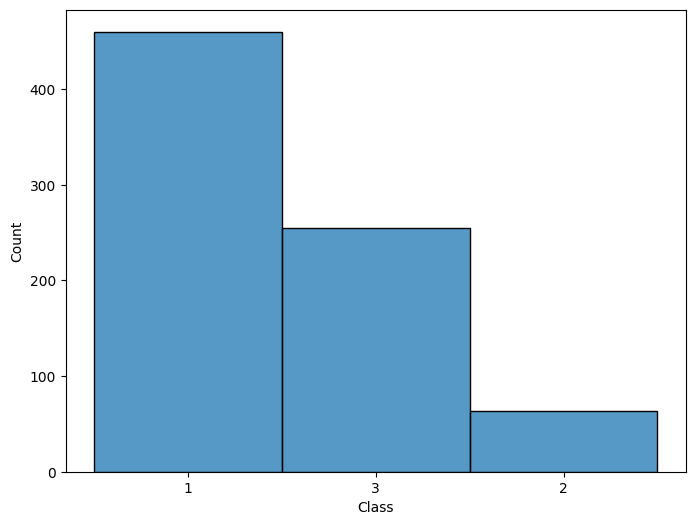

In [37]:
class_object = dataset.raw['Class'].astype('str')
plt.figure(figsize=(8, 6))
sns.histplot(class_object)
plt.show()

The dataset is imbalanced in respect to classes proportions

## Correlation heatmap

In [38]:
numerical_data = dataset.raw.select_dtypes(exclude="object")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nHM       779 non-null    int64  
 1   piPC09    779 non-null    float64
 2   PCD       779 non-null    float64
 3   X2Av      779 non-null    float64
 4   MLOGP     779 non-null    float64
 5   ON1V      779 non-null    float64
 6   N-072     779 non-null    int64  
 7   B02[C-N]  779 non-null    int64  
 8   F04[C-O]  779 non-null    int64  
 9   Class     779 non-null    int64  
 10  logBCF    779 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 67.1 KB


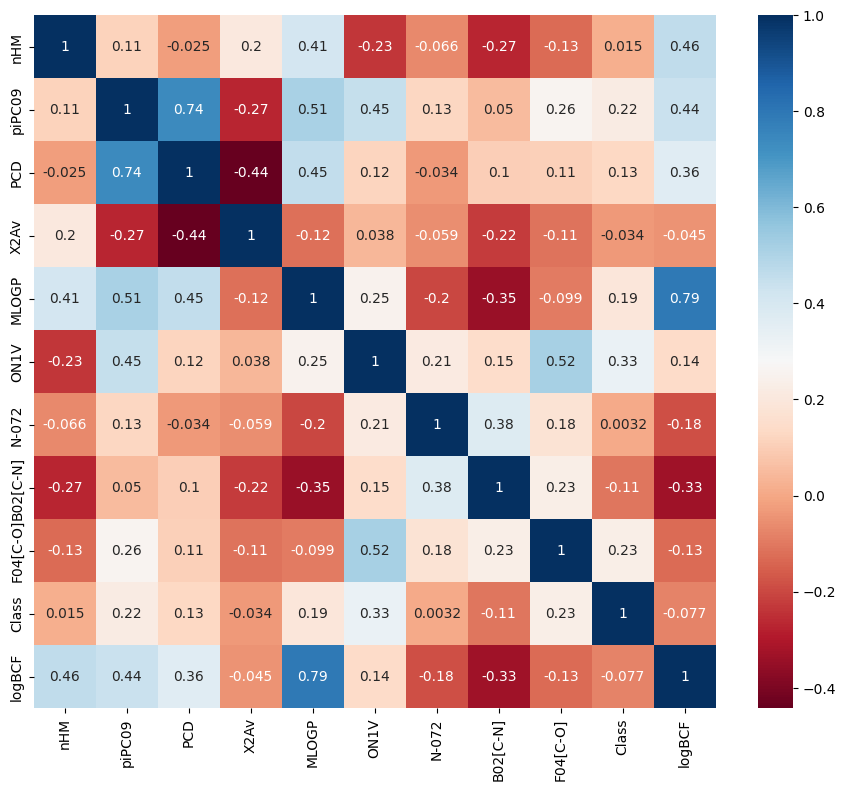

In [39]:
corr = numerical_data.corr()
plt.figure(figsize=(11, 9))
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.show()

The correlation heatmap shows the most and the least informative features in relation to classes and logBCF

## Box plot

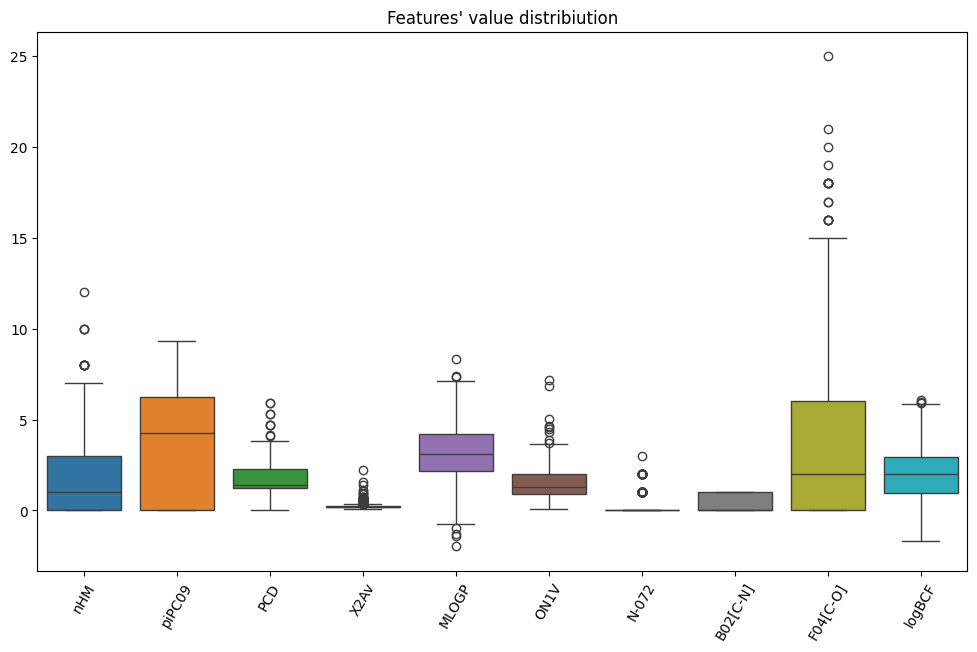

In [40]:
dataset.raw['Class'] = dataset.raw['Class'].astype(str)

plt.figure(figsize=(12, 7))
bp = sns.boxplot(data=dataset.raw)
bp.xaxis.set_tick_params(rotation=60)
bp.set_title('Features\' value distribiution')
plt.show()

The box plot shows a number of outliers in most of the features

# Preprocessing

In [41]:
from preprocessing_tools import Dataset, adjust_shape
import yaml
import os
import re

In [42]:
def find_latest_version(path: str, name: str, next_version: bool, extention: str = '') -> str:
    if any(f'{name}_' in dir_name for dir_name in os.listdir(path)):
        version = max(map(int, re.findall(rf'{name}_(\d+)',
                                          ';'.join(os.listdir(path)))))
        if next_version:
            version += 1

        return f'{path}/{name}_{version}{extention}'

    else:
        return f'{path}/{name}_1{extention}'


In [43]:
# Config file loading
config_file_path ='./config.yaml'
with open(config_file_path) as file:
    config = yaml.safe_load(file)['etl']

In [44]:
# Raw data loading and splitting
data = Dataset(config['raw_data'])
data.split_data(
    class_column=config['class_column'],
    reg_column=config['reg_column'],
    classification=config['classification'],
    regression=config['regression'],
    test_size=config['test_size'],
    val_size=config['val_size'],
    random_state=123)

In [45]:
data.raw

,CAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],Train,0,0.000,1.49,0.14,1.35,0.72,0,1,5,1,0.74
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],Train,0,0.000,1.47,0.14,1.70,0.88,0,1,5,1,0.93
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,Train,0,0.000,1.20,0.25,4.14,2.06,0,0,0,3,3.24
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],Train,0,0.000,1.69,0.13,1.89,0.79,0,1,8,3,-0.40
4,100-40-3,C=CC1CCC=CC1,Train,0,0.000,0.52,0.25,2.65,1.31,0,0,0,1,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,99-30-9,O=[N+]([O-])c1cc(c(N)c(c1)Cl)Cl,Train,2,0.000,1.48,0.17,2.57,0.73,0,1,4,1,1.88
775,99387-89-0,FC(F)(F)c2cc(ccc2(N=C(n1cncc1)COCCC))Cl,Test,1,6.564,2.37,0.16,3.77,2.28,0,1,3,2,2.59
776,99-65-0,O=[N+]([O-])c1cccc(c1)[N+](=O)[O-],Train,0,0.000,1.71,0.13,1.89,0.79,0,1,8,1,0.77
777,99-71-8,CC(c1ccc(cc1)O)CC,Test,0,0.000,1.19,0.21,2.81,1.69,0,0,1,3,1.35


In [46]:
# Data processing
if config['remove_outliers']:
    data.remove_outliers()

if config['scale_standarization'] or config['scale_minamx']:
    data.scale(standard=config['scale_standarization'], minmax=config['scale_minamx'])

if config['resample']:
    data.resample()

if config['adjust_shape']:
    data.y = adjust_shape(data.y)

Removed outliers in columns: ['piPC09', 'X2Av', 'MLOGP', 'ON1V', 'PCD']
Standarization done properly in columns: ['piPC09', 'X2Av', 'MLOGP', 'ON1V', 'PCD']


In [47]:
# Processed data exporting
new_data_path = find_latest_version('./data', 'processed_data', next_version=True)
os.mkdir(new_data_path)
for subset in data.subsets:
    if eval(f'data.{subset}') is not None:
        output_path = f'{new_data_path}/{subset}.csv'
        eval(f'data.{subset}').to_csv(output_path)
        print(f'Saved subset as {output_path}')

Saved subset as ./data/processed_data_67/X.csv
Saved subset as ./data/processed_data_67/X_test.csv
Saved subset as ./data/processed_data_67/y.csv
Saved subset as ./data/processed_data_67/y_test.csv


# Model training

In [48]:
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers

In [49]:
# Loading config file
with open('config.yaml') as file:
    config = yaml.safe_load(file)['train']
config

{'processed_data_version': 'recent',
 'l1': 1e-05,
 'l2': 1e-05,
 'dropout': 0.4,
 'batchSize': 10,
 'epochs': 350}

In [50]:
# Setting hyperparameters variables
l1 = config['l1']
l2 = config['l2']
dropout = config['dropout']
batch_size = config['batchSize']
epochs = config['epochs']

In [51]:
# Defining sequential model's architecture
model = Sequential()

model.add(Dense(
    512,
    input_dim=data.X.shape[1],
    activation='leaky_relu',
    kernel_regularizer=regularizers.L1L2(l1, l2),
    bias_regularizer=regularizers.L1L2(l1, l2)
    ))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(
    256,
    activation='leaky_relu',
    kernel_regularizer=regularizers.L1L2(l1, l2),
    bias_regularizer=regularizers.L1L2(l1, l2)
    ))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(
    128,
    activation='leaky_relu',
    kernel_regularizer=regularizers.L1L2(l1, l2),
    bias_regularizer=regularizers.L1L2(l1, l2)
    ))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(
    64,
    activation='leaky_relu',
    kernel_regularizer=regularizers.L1L2(l1, l2),
    bias_regularizer=regularizers.L1L2(l1, l2)
    ))
model.add(BatchNormalization())
model.add(Dropout(dropout))


model.add(Dense(
    32,
    activation='leaky_relu',
    kernel_regularizer=regularizers.L1L2(l1, l2),
    bias_regularizer=regularizers.L1L2(l1, l2)
    ))
model.add(BatchNormalization())

model.add(Dense(3, activation='softmax'))

/home/wiktor/miniconda3/envs/qsar/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Model configuration
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 181,763 (710.01 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [53]:
# Training the model
history = model.fit(data.X, data.y,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.3951 - loss: 1.4132 - val_acc: 0.0947 - val_loss: 1.5424
Epoch 2/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4773 - loss: 1.2031 - val_acc: 0.1770 - val_loss: 1.3891
Epoch 3/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5042 - loss: 1.0966 - val_acc: 0.3210 - val_loss: 1.2882
Epoch 4/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5285 - loss: 1.0787 - val_acc: 0.3580 - val_loss: 1.2583
Epoch 5/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5407 - loss: 1.0595 - val_acc: 0.4156 - val_loss: 1.1794
Epoch 6/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5510 - loss: 1.0453 - val_acc: 0.3704 - val_loss: 1.2136
Epoch 7/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5623 - loss: 1.0177 - val_acc: 0.4156 - val_loss: 1.2055
Epoch 8/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5860 - loss: 1.0251 - val_acc: 0.3951 - val_loss: 1.2003
Epoch 9/350
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5741

In [54]:
# Exporting model
output_path = "./saved_models"
if not os.path.exists(output_path):
    os.makedirs(output_path)
model_output_path = find_latest_version(output_path, 'classification_sequential', next_version=True)
model.save(model_output_path + ".keras")

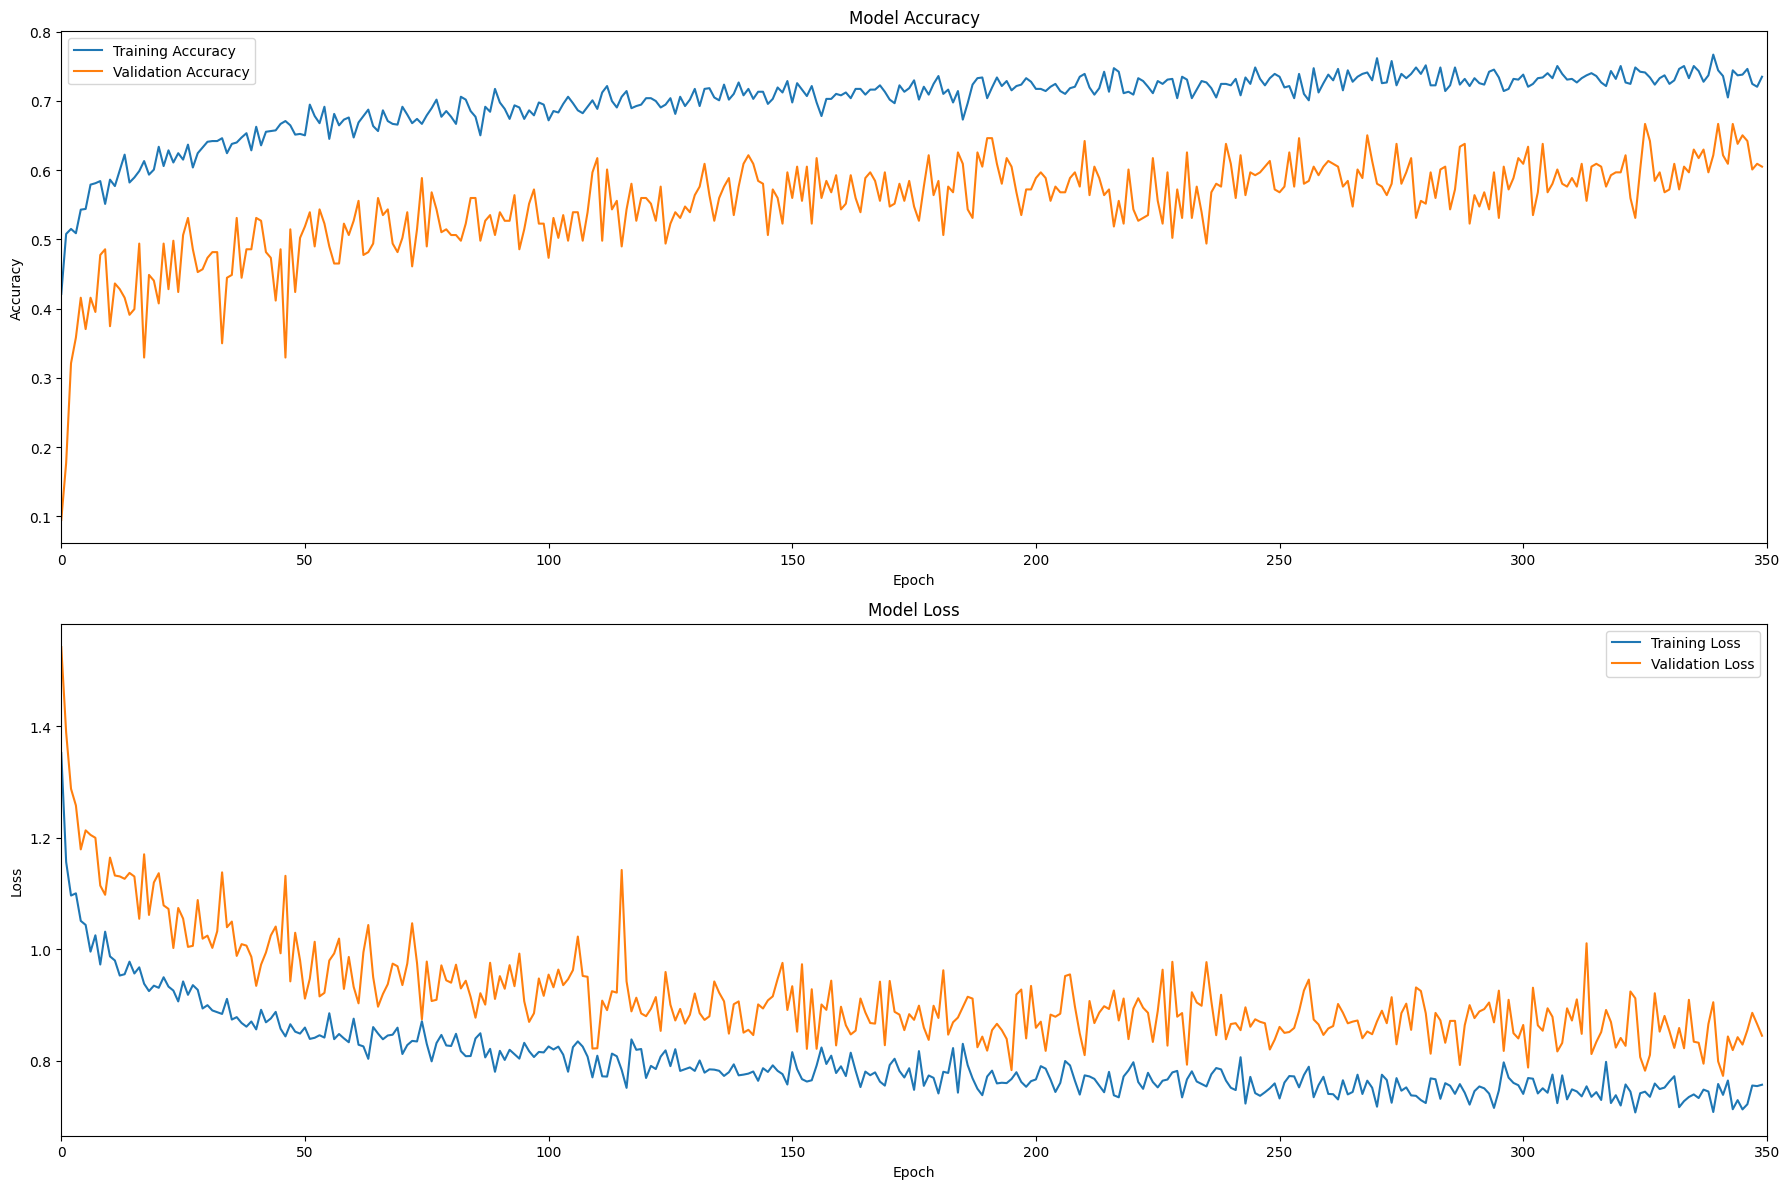

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(18, 12))

# Plot for accuracy
ax = plt.subplot(2, 1, 1)
ax.set_xlim(0, epochs)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
ax = plt.subplot(2, 1, 2)
ax.set_xlim(0, epochs)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model evaluation

In [56]:
from sklearn.metrics import classification_report
import numpy as np

In [57]:
data.y_test = adjust_shape(data.y_test)

In [58]:
data.X_test

,nHM,piPC09,X2Av,MLOGP,ON1V,N-072,PCD,B02[C-N],F04[C-O]
587,4,0.398093,0.468720,-0.062755,0.286543,0,-0.324240,1,6
88,1,0.944622,-0.582531,0.270986,0.955715,2,0.628174,1,8
30,0,-1.052747,-0.465725,-1.022257,-0.516464,0,-0.158603,1,4
374,2,0.669019,0.293512,-1.203033,-0.382629,0,-0.158603,0,5
544,3,-1.052747,-0.056905,0.257080,-1.066672,0,-0.262126,1,0
...,...,...,...,...,...,...,...,...,...
327,4,-1.052747,1.169554,0.875889,-0.858485,0,-1.556167,0,0
291,0,-1.052747,-0.465725,-0.862340,-0.665168,0,-0.003318,1,8
568,0,-1.052747,0.235109,-2.232065,-1.259988,1,-1.328416,0,0
609,3,-1.052747,0.001498,-0.111425,-1.616880,0,-1.556167,0,0


In [59]:
model.evaluate(data.X_test, data.y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5750 - loss: 1.0351 


[1.0547635555267334, 0.5641025900840759]

In [60]:
y_test = np.argmax(data.y_test, axis=1)
y_pred = np.argmax(model.predict(data.X_test), axis=1)
print(classification_report(y_pred, y_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
              precision    recall  f1-score   support

           0       0.74      0.62      0.67        55
           1       0.33      0.25      0.29         8
           2       0.31      0.53      0.39        15

    accuracy                           0.56        78
   macro avg       0.46      0.47      0.45        78
weighted avg       0.61      0.56      0.58        78

